In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [13]:
df_x=pd.read_csv('./TrainingData/Logistic_X_Train.csv')
df_y=pd.read_csv('./TrainingData/Logistic_Y_Train.csv')


In [14]:
x=df_x.values
y=df_y.values
split=int(0.8*x.shape[0])
x_train=x[:split,]
y_train=y[:split,]
x_test=x[split:,]
y_test=y[split:,]
print(x_train.shape,'\n\n\n\n',x_test.shape)

(2400, 3) 



 (600, 3)


In [15]:
def hypothesis(x,w,b):
    return sigmoid(np.dot(x,w)+b)

def sigmoid(h):
    return 1.0/(1.0+np.exp(-1.0*h))

def error(x,y,w,b):
    err=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        err+=y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/x.shape[0]

def get_grad(x,w,b,y):
    m=x.shape[0]
    w_grad=np.zeros(w.shape[0])
    b_grad=0.0
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        w_grad+=((y[i]-hx)*x[i])
        b_grad+=(y[i]-hx)
    return [w_grad,b_grad]

def gradient_descent(x,y,w,b,learning_rate=0.01):
    err = error(x,y,w,b)
    [grad_w,grad_b] = get_grad(x,w,b,y)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

def get_acc(x_tst,y_tst,w,b):
    y_pred = []
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)    
    y_pred = np.array(y_pred)
    return  float((y_pred-y_tst).sum())/y_tst.shape[0]


In [16]:
loss = []
acc = []

w = 2*np.random.random((x_train.shape[1],))
b = 5*np.random.random()

In [17]:
for i in range(1000):
    l,w,b = gradient_descent(x_train,y_train,w,b,learning_rate=0.01)
    acc.append(get_acc(x_test,y_test,w,b))
    loss.append(l)

/home/saksham_user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log2
  # This is added back by InteractiveShellApp.init_path()
/home/saksham_user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


[-0.04111574]


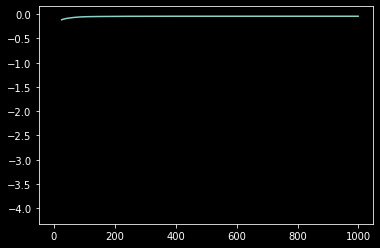

In [18]:
plt.plot(loss)
print(loss[-1])

2.0


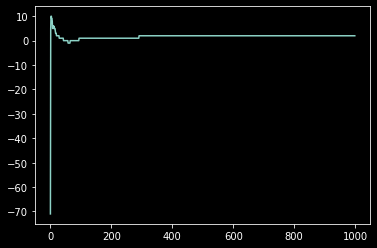

In [19]:
plt.plot(acc)
print(acc[-1])

In [20]:
print(w,'\n',b)

[-4.76874706  3.98185707 -2.51753471] 
 [-5.40858159]


In [28]:
df_x_test=pd.read_csv('./TestingData/Logistic_X_Test.csv')
x_test=df_x_test.values

In [40]:
y = []
for i in range(x_test.shape[0]):
    p = predict(x_test[i],w,b)
    y.append(p)
y=np.array(y)
print(y)

[1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0
 0 1 0 1 0 1 0 0 0 0 0 0 